In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Teste com a 1ª imagem

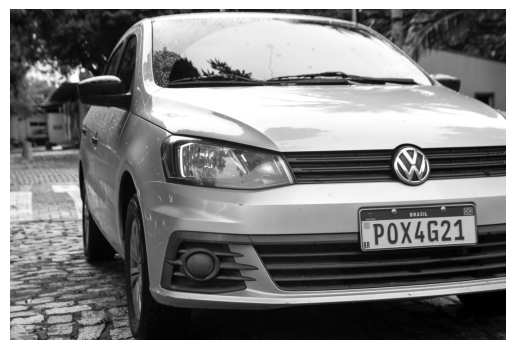

In [306]:
# Carregando a imagem
img = cv2.imread('img_carro3.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.show()

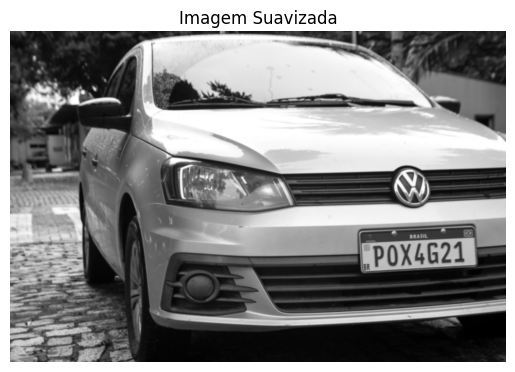

In [307]:
# Aplicação da Suavização Gaussiana
img_suavizada = cv2.GaussianBlur(img_gray, (7, 7), 0)

plt.imshow(img_suavizada, cmap='gray')
plt.title('Imagem Suavizada')
plt.axis("off")
plt.show()

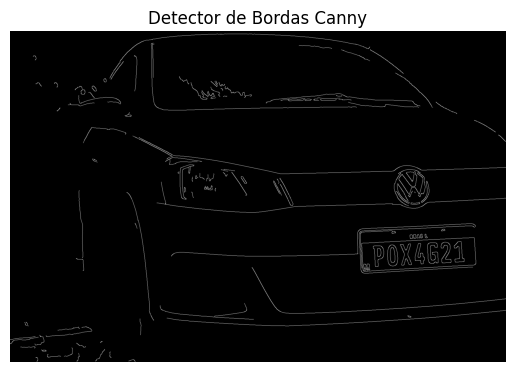

In [308]:
# Detecção de Bordas com Canny

bordas = cv2.Canny(img_suavizada, 150, 280) 

plt.imshow(bordas, cmap='gray')
plt.title('Detector de Bordas Canny')
plt.axis("off")
plt.show()

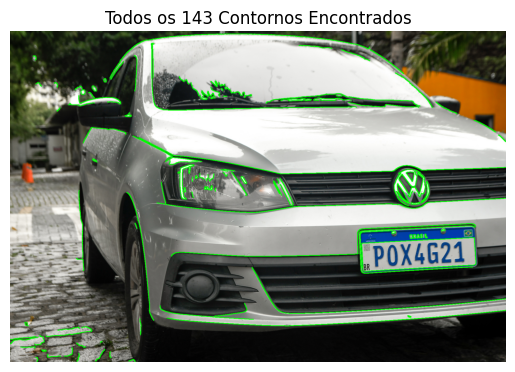

Número de contornos encontrados: 143


In [309]:
# Detecção de Contornos na imagem de bordas

contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_com_contornos = img.copy()
cv2.drawContours(img_com_contornos, contornos, -1, (0, 255, 0), 2) 

plt.imshow(cv2.cvtColor(img_com_contornos, cv2.COLOR_BGR2RGB))
plt.title(f'Todos os {len(contornos)} Contornos Encontrados')
plt.axis("off")
plt.show()

print(f"Número de contornos encontrados: {len(contornos)}")

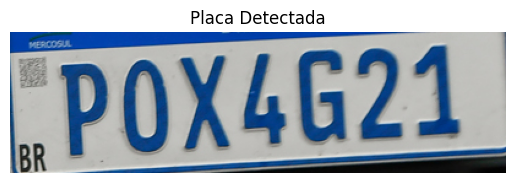

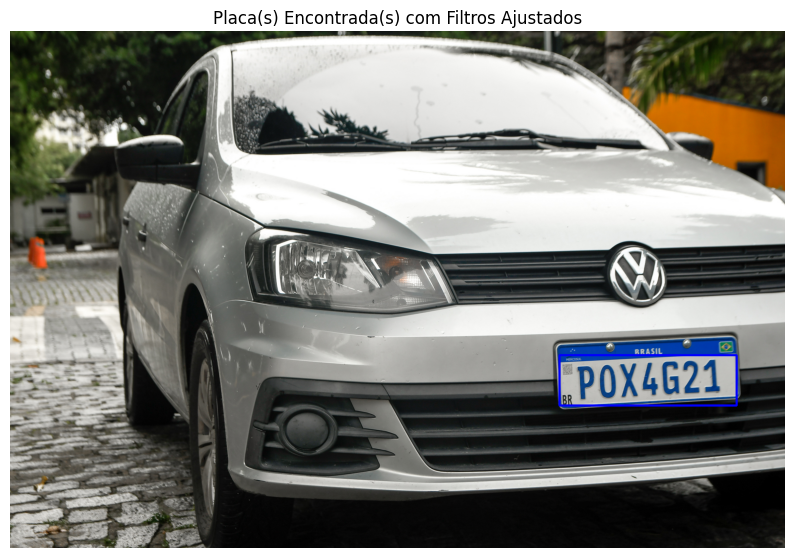

In [310]:
# Inspeção de contornos para encontrar a placa

proporcao_min_ajustada = 2.8
proporcao_max_ajustada = 4.5
area_min_ajustada = 38000
area_max_ajustada = 42000

img_placa_final = img.copy()
placa_encontrada_final = False

for i, contorno in enumerate(contornos):
    perimetro = cv2.arcLength(contorno, True)
    epsilon = 0.02 * perimetro 
    aproximacao_poligonal = cv2.approxPolyDP(contorno, epsilon, True)

    if len(aproximacao_poligonal) == 4:
        (x, y, w, h) = cv2.boundingRect(aproximacao_poligonal)
        proporcao = w / float(h) if h > 0 else 0
        area = cv2.contourArea(contorno)

        if proporcao_min_ajustada < proporcao < proporcao_max_ajustada and \
           area_min_ajustada < area < area_max_ajustada:
            
            cv2.rectangle(img_placa_final, (x, y), (x + w, y + h), (255, 0, 0), 3) # Azul
            placa_encontrada_final = True
            roi_placa = img[y:y+h, x:x+w]

            plt.figure()
            plt.imshow(cv2.cvtColor(roi_placa, cv2.COLOR_BGR2RGB))
            plt.title(f"Placa Detectada")
            plt.axis("off")
            plt.show()
            # break # Descomente se quiser parar na primeira placa encontrada

if placa_encontrada_final:
    plt.figure(figsize=(10,8))
    plt.imshow(cv2.cvtColor(img_placa_final, cv2.COLOR_BGR2RGB))
    plt.title('Placa(s) Encontrada(s) com Filtros Ajustados')
    plt.axis("off")
    plt.show()
else:
    print("\nNenhuma placa encontrada mesmo com os filtros potencialmente ajustados.")
    print("Verifique a saída da inspeção e os valores de _ajustada.")
    print(f"Critérios usados: Proporção ({proporcao_min_ajustada}-{proporcao_max_ajustada}), Área ({area_min_ajustada}-{area_max_ajustada})")

# Teste com a 2ª imagem

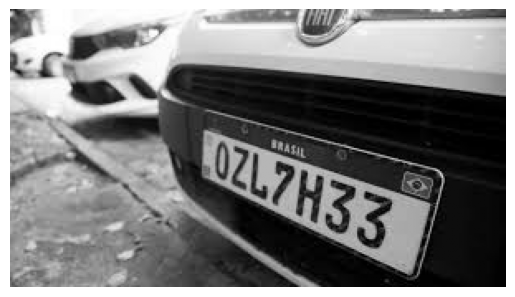

In [300]:
# Carregando a imagem
img = cv2.imread('img_carro5.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.show()

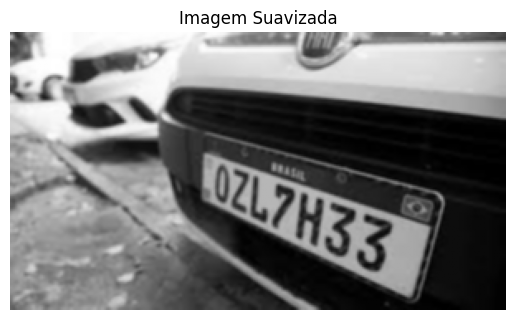

In [301]:
# Aplicação da Suavização Gaussiana
img_suavizada = cv2.GaussianBlur(img_gray, (3, 3), 0)

plt.imshow(img_suavizada, cmap='gray')
plt.title('Imagem Suavizada')
plt.axis("off")
plt.show()

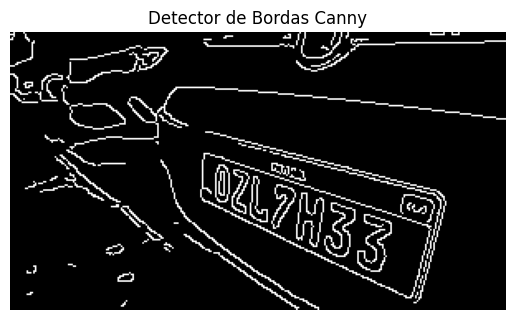

In [302]:
# Detecção de Bordas com Canny

bordas = cv2.Canny(img_suavizada, 200, 250) 

plt.imshow(bordas, cmap='gray')
plt.title('Detector de Bordas Canny')
plt.axis("off")
plt.show()

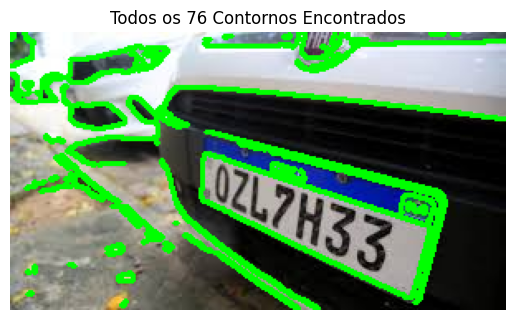

Número de contornos encontrados: 76


In [303]:
# Detecção de Contornos na imagem de bordas

contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_com_contornos = img.copy()
cv2.drawContours(img_com_contornos, contornos, -1, (0, 255, 0), 2) 

plt.imshow(cv2.cvtColor(img_com_contornos, cv2.COLOR_BGR2RGB))
plt.title(f'Todos os {len(contornos)} Contornos Encontrados')
plt.axis("off")
plt.show()

print(f"Número de contornos encontrados: {len(contornos)}")

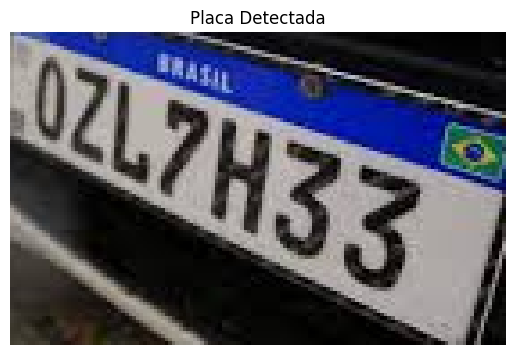

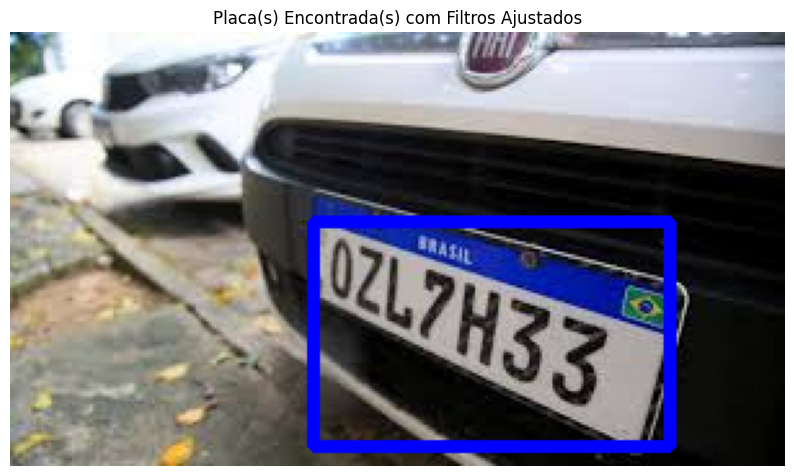

In [304]:
# Inspeção de contornos para encontrar a placa

proporcao_min_ajustada = 1.0
proporcao_max_ajustada = 2.0
area_min_ajustada = 4500
area_max_ajustada = 5500

img_placa_final = img.copy()
placa_encontrada_final = False

for i, contorno in enumerate(contornos):
    perimetro = cv2.arcLength(contorno, True)
    epsilon = 0.02 * perimetro 
    aproximacao_poligonal = cv2.approxPolyDP(contorno, epsilon, True)

    if len(aproximacao_poligonal) == 4:
        (x, y, w, h) = cv2.boundingRect(aproximacao_poligonal)
        proporcao = w / float(h) if h > 0 else 0
        area = cv2.contourArea(contorno)

        if proporcao_min_ajustada < proporcao < proporcao_max_ajustada and \
           area_min_ajustada < area < area_max_ajustada:
            
            cv2.rectangle(img_placa_final, (x, y), (x + w, y + h), (255, 0, 0), 3) # Azul
            placa_encontrada_final = True
            roi_placa = img[y:y+h, x:x+w]

            plt.figure()
            plt.imshow(cv2.cvtColor(roi_placa, cv2.COLOR_BGR2RGB))
            plt.title(f"Placa Detectada")
            plt.axis("off")
            plt.show()
            # break # Descomente se quiser parar na primeira placa encontrada

if placa_encontrada_final:
    plt.figure(figsize=(10,8))
    plt.imshow(cv2.cvtColor(img_placa_final, cv2.COLOR_BGR2RGB))
    plt.title('Placa(s) Encontrada(s) com Filtros Ajustados')
    plt.axis("off")
    plt.show()
else:
    print("\nNenhuma placa encontrada mesmo com os filtros potencialmente ajustados.")
    print("Verifique a saída da inspeção e os valores de _ajustada.")
    print(f"Critérios usados: Proporção ({proporcao_min_ajustada}-{proporcao_max_ajustada}), Área ({area_min_ajustada}-{area_max_ajustada})")

# Teste com a 3ª imagem

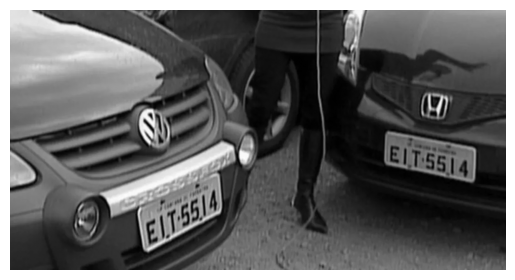

In [311]:
# Carregando a imagem
img = cv2.imread('img_carro7.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.show()

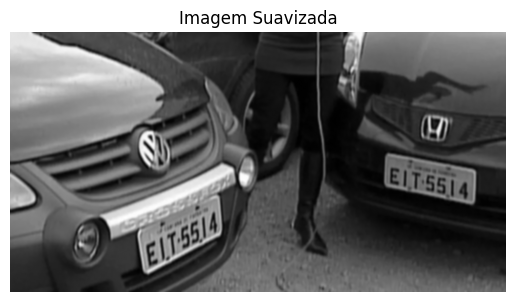

In [312]:
# Aplicação da Suavização Gaussiana
img_suavizada = cv2.GaussianBlur(img_gray, (7, 7), 0)

plt.imshow(img_suavizada, cmap='gray')
plt.title('Imagem Suavizada')
plt.axis("off")
plt.show()

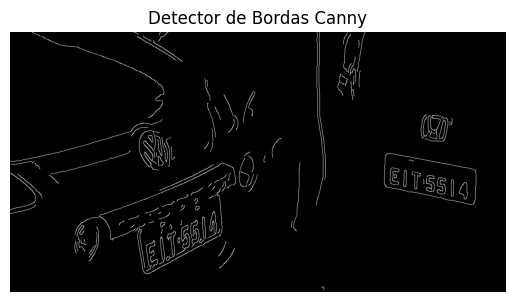

In [313]:
# Detecção de Bordas com Canny

bordas = cv2.Canny(img_suavizada, 100, 150) 

plt.imshow(bordas, cmap='gray')
plt.title('Detector de Bordas Canny')
plt.axis("off")
plt.show()

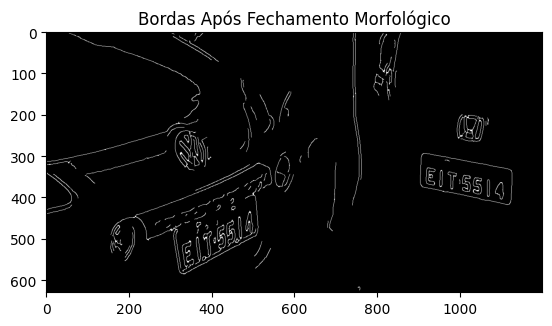

In [314]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
bordas_fechadas = cv2.morphologyEx(bordas, cv2.MORPH_CLOSE, kernel)

plt.imshow(bordas_fechadas, cmap='gray')
plt.title('Bordas Após Fechamento Morfológico')
plt.show()

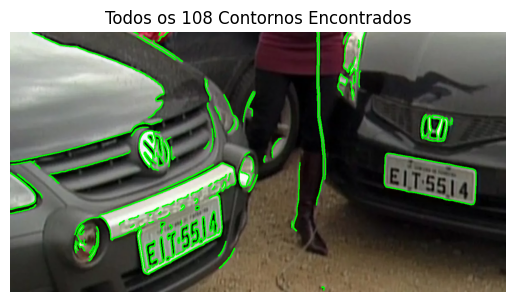

Número de contornos encontrados: 108


In [315]:
# Detecção de Contornos na imagem de bordas

contornos, hierarquia = cv2.findContours(bordas_fechadas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_com_contornos = img.copy()
cv2.drawContours(img_com_contornos, contornos, -1, (0, 255, 0), 2) 

plt.imshow(cv2.cvtColor(img_com_contornos, cv2.COLOR_BGR2RGB))
plt.title(f'Todos os {len(contornos)} Contornos Encontrados')
plt.axis("off")
plt.show()

print(f"Número de contornos encontrados: {len(contornos)}")


--- Tente filtrar novamente com valores ajustados ---
1 placa(s) encontrada(s)!


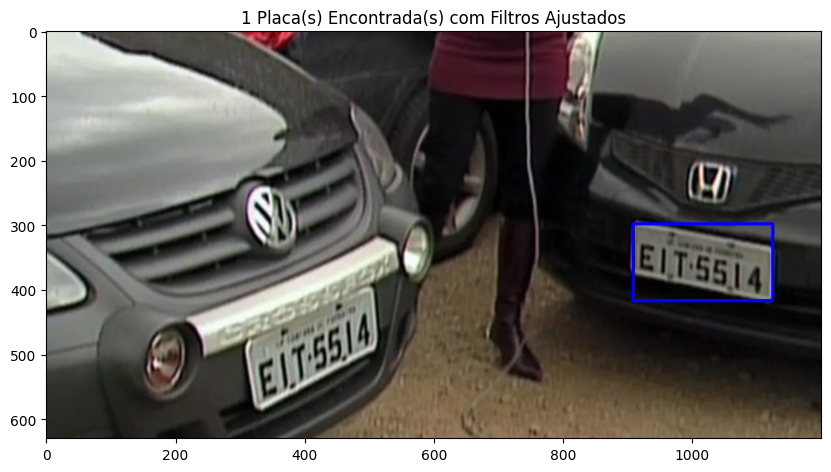

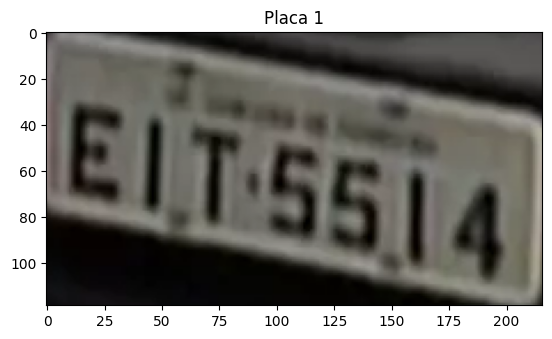

In [316]:

proporcao_min_ajustada = 1.5  
proporcao_max_ajustada = 2.0 
area_min_ajustada = 18000    
area_max_ajustada = 19000 

print("\n--- Tente filtrar novamente com valores ajustados ---")
img_placa_final = img.copy()
placas_encontradas_rois = [] 
coordenadas_placas_encontradas = [] 

for i, contorno in enumerate(contornos):
    perimetro = cv2.arcLength(contorno, True)
    epsilon = 0.02 * perimetro 
    aproximacao_poligonal = cv2.approxPolyDP(contorno, epsilon, True)

    if len(aproximacao_poligonal) == 4:
        (x, y, w, h) = cv2.boundingRect(aproximacao_poligonal)
        proporcao = w / float(h) if h > 0 else 0
        area = cv2.contourArea(contorno)

        if proporcao_min_ajustada < proporcao < proporcao_max_ajustada and \
           area_min_ajustada < area < area_max_ajustada:
            
            cv2.rectangle(img_placa_final, (x, y), (x + w, y + h), (255, 0, 0), 3) # Azul
            roi_placa = img[y:y+h, x:x+w]
            placas_encontradas_rois.append(roi_placa)
            coordenadas_placas_encontradas.append((x,y,w,h))

if placas_encontradas_rois:
    print(f"{len(placas_encontradas_rois)} placa(s) encontrada(s)!")
    
    # Mostra a imagem com todas as placas destacadas
    plt.figure(figsize=(10,8))
    plt.imshow(cv2.cvtColor(img_placa_final, cv2.COLOR_BGR2RGB))
    plt.title(f'{len(placas_encontradas_rois)} Placa(s) Encontrada(s) com Filtros Ajustados')
    plt.show()

    # Mostra cada ROI individualmente
    for idx, roi in enumerate(placas_encontradas_rois):
        plt.figure()
        x_c, y_c, w_c, h_c = coordenadas_placas_encontradas[idx] # Pega as coordenadas
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title(f"Placa {idx+1}")
        plt.show()
else:
    print("\nNenhuma placa encontrada com os filtros atuais.")